In [1]:
import sys

In [2]:
!{sys.executable} -m pip install -r ../requirements.txt

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: /opt/homebrew/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip


In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def myconvolve2d(img, kernel):
    kernel_height = kernel.shape[0]
    kernel_height_halved = int((kernel_height-1)/2)
    kernel_width = kernel.shape[1]
    kernel_width_halved = int((kernel_width-1)/2)
    img = np.pad(img, ((kernel_height_halved, kernel_height_halved), 
                    (kernel_width_halved, kernel_width_halved)), 
                mode='constant', constant_values=0)
    img_height = img.shape[0]
    img_width = img.shape[1]
    convolution = []
    # start at row kernel_height_halved, end at row img_height-kernel_height_halved
    for i in range(kernel_height_halved, img_height-kernel_height_halved):
        lst = []
        # start at col kernel_width_halved, end at col img_width-kernel_height_halved
        for j in range(kernel_width_halved, img_width-kernel_width_halved):
            lst.append((img[i-kernel_height_halved:i+kernel_height_halved+1,
                            j-kernel_width_halved:j+kernel_width_halved+1] * kernel).sum().item())
        convolution.append(lst)
    return np.array(convolution)


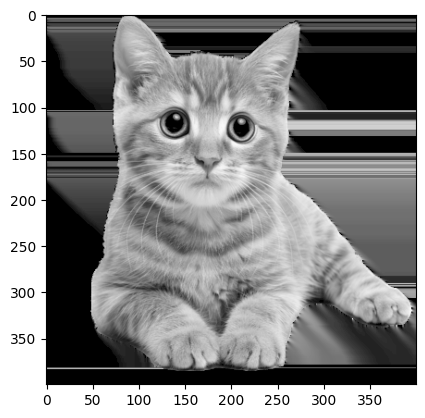

In [12]:
img = cv2.imread("../cat.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')

In [13]:
# gabor kernel implementation
def gabor_kernel(theta, lambd, sigma=4.0, gamma=0.5, psi=0, size=31):
    half = size // 2
    y, x = np.meshgrid(np.arange(-half, half+1), np.arange(-half, half+1))

    # rotate coordinates
    x_theta = x * np.cos(theta) + y * np.sin(theta)
    y_theta = -x * np.sin(theta) - y * np.cos(theta)

    exp_term = np.exp(-(x_theta**2 + (gamma**2) * y_theta**2) / (2 * sigma**2))
    cos_term = np.cos(2 * np.pi * x_theta / lambd + psi)

    return exp_term * cos_term

# apply the actual kernel with myconvolve2d
def apply_gabor_filter(img, theta, lambd, sigma=4.0, gamma=0.5, psi=0, size=31):
    kernel = gabor_kernel(theta, lambd, sigma, gamma, psi, size)
    return myconvolve2d(img, kernel)

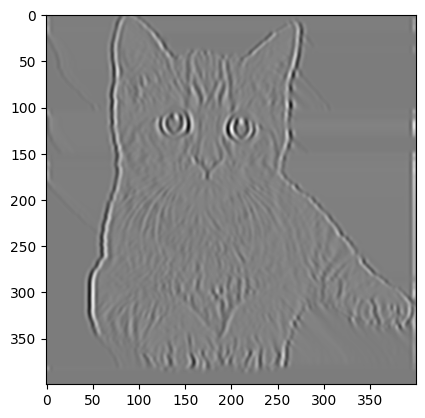

In [33]:
gabor_img = apply_gabor_filter(img, np.pi/2, 8, 4, 2)
plt.imshow(gabor_img, cmap='gray')